> 데이터 : 학생 성적에 관한 소규모 데이터


1. 시각화 포함 탐색적 자료 분석 수행
2. 결측치 식별, 예측하는 두 가지 방법을 쓰고, 이를 선택한 이유를 설명
3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용. 이때, 이를 선택한 이유 설명
4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할 적용. 이때, 이를 선택한 이유 설명
5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고, 학생성적 예측 분석에 적합한 알고리즘인지 설명
6. 세 가지 모델 모두 모델링해보고 가장 적합한 알고리즘 선택. 이때, 이를 선택한 이유와 모델의 한계점, 보완 가능한 부분을 설명하고 현업에서 주의할 점 기술

---

# 1. 시각화 포함 탐색적 자료 분석 수행

In [1]:
import pandas as pd

# 시험 환경에 맞는 데이터세트로 수정
student = pd.read_csv('./data/student.csv')
student.head()
student.info()

student = student[['school', 'sex', 'paid', 'activities', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]
student.rename(columns = {'G3' :'grade'}, inplace=True)
student

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,grade
0,GP,F,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,no,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,yes,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,yes,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,no,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,no,no,4,4,1,3,4,5,0,11,12,10


#### * 결측치가 발견되지 않았다.

In [2]:
student.info()
student.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   paid        395 non-null    object
 3   activities  395 non-null    object
 4   famrel      395 non-null    int64 
 5   freetime    395 non-null    int64 
 6   goout       395 non-null    int64 
 7   Dalc        395 non-null    int64 
 8   Walc        395 non-null    int64 
 9   health      395 non-null    int64 
 10  absences    395 non-null    int64 
 11  G1          395 non-null    int64 
 12  G2          395 non-null    int64 
 13  grade       395 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 43.3+ KB


,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### * 종속변수(grade)는 int형, 독립변수는 object, int형으로 구성되어 있다.
#### * object형은 인코딩을 통해 변환해줄 필요가 있다.

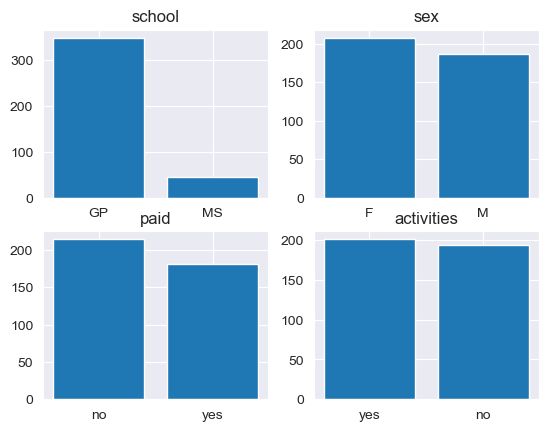

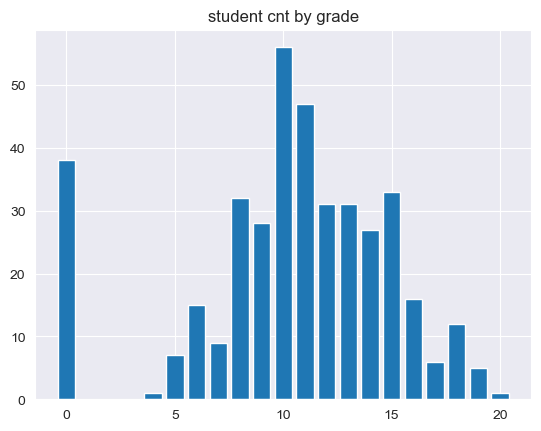

In [3]:
# 학교 개수 확인
student.school.unique()

# 범주형 변수 시각화(school, sex, paid, activities)
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2)
axs[0][0].bar(student['school'].value_counts().index, student['school'].value_counts().values)
axs[0][1].bar(student['sex'].value_counts().index, student['sex'].value_counts().values)
axs[1][0].bar(student['paid'].value_counts().index, student['paid'].value_counts().values)
axs[1][1].bar(student['activities'].value_counts().index, student['activities'].value_counts().values)
axs[0][0].set_title('school')
axs[0][1].set_title('sex')
axs[1][0].set_title('paid')
axs[1][1].set_title('activities')
plt.show()

# 성적 분포 확인
plt.bar(student['grade'].value_counts().index, student['grade'].value_counts().values)
plt.title('student cnt by grade')
plt.show()

#### * school에서 GP학교가 MS학교보다 많다.
#### * sex, paid, activities는 거의 동등
#### * 성적은 정규분포를 띄지는 않는 것으로 확인된다.

In [14]:
# 상관관계 확인
student_corr = student.corr(method='pearson')
import seaborn as sns
sns.heatmap(student_corr, annot = True, xticklabels = student_corr.columns, yticklabels = student_corr.columns, cmap = 'RdBu_r', linewidth = 3)
plt.show()

AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

#### * grade(타깃변수)는 G1, G2와 상관관계가 가장 강하고, G1, G2도 서로 상관관계가 강한 것으로 파악된다.
#### * 나머지 변수들은 다중공선성을 의심할만큼(0.9) 상관성이 큰 것들이 발견되지 않았다.

# 2. 결측치 식별, 예측하는 두 가지 방법을 쓰고, 이를 선택한 이유를 설명

#### * 결측치를 식별하는 방법은 isna().sum()을 이용할 수 있다.

In [13]:
student.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
grade         0
dtype: int64

# 3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용. 이때, 이를 선택한 이유 설명

#### * EDA 과정에서 확인했다시피, school, sex, paid, activites 4개의 변수는 이산형 독립변수이다. -> 원핫인코딩 진행
#### * 나머지 변수들은 int형 변수이고, 수치나 순위형 변수로 판단되므로 인코딩을 진행하지 않았다.

In [14]:
student = pd.get_dummies(data = student, columns = ['school', 'sex', 'paid', 'activities'], drop_first=True)
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   famrel          395 non-null    int64
 1   freetime        395 non-null    int64
 2   goout           395 non-null    int64
 3   Dalc            395 non-null    int64
 4   Walc            395 non-null    int64
 5   health          395 non-null    int64
 6   absences        395 non-null    int64
 7   G1              395 non-null    int64
 8   G2              395 non-null    int64
 9   grade           395 non-null    int64
 10  school_MS       395 non-null    uint8
 11  sex_M           395 non-null    uint8
 12  paid_yes        395 non-null    uint8
 13  activities_yes  395 non-null    uint8
dtypes: int64(10), uint8(4)
memory usage: 32.5 KB


# 4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할 적용. 이때, 이를 선택한 이유 설명

#### * 데이터 분할 방법은 랜던하게 분할하는 방법(랜덤 분할)과 층화를 이루며 분할하는 방법(층화 추출 기법)이 존재한다.
#### 랜덤 분할
* train test 데이터세트를 나누어서 학습된 데이터를 검증할 수 있으며, 분할 시 무작위로 사용자가 지정하여 비율로 분할한다.
* 전체 분석 데이터 중 머신러닝 모델을 학습시키기 위한 학습용 데이터와 테스트용 데이터를 나누어서 적용시키는 이유는 모델 결과가 다른 데이터에서도 적용 가능한지, 일반화가 가능한지를 검증하기 위함이다.

#### 층화 추출 기법(stratify)
* 종속변수가 범주형인 경우, 종속변수의 클래스의 비율을 기준으로 학습용 데이터와 테스트용 데이터의 비율이 동일하게 분할되어야 한다.
* 이렇게 하여 분할 시 클래스의 편향을 막을 수 있다.

#### * 이때, 주어진 데이터 세트의 종속변수(grade)는 범주형 변수가 아닌 연속형 변수이므로 회귀분석을 사용한다.
#### * 따라서 층화 추출 기법을 사용하지 않고 7:3 비율로 분할하였다.

In [15]:
# train, test 세트 7:3으로 분할
from sklearn.model_selection import train_test_split
y = student.pop('grade')
x = student

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 731)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(276, 13) (119, 13) (276,) (119,)


# 5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고, 학생성적 예측 분석에 적합한 알고리즘인지 설명

#### svm, xgboost, randomforest의 공통점
* 회귀분석 시 사용할 수 있는 알고리즘이다.
* 분류분석 시에도 사용할 수 있는 알고리즘이다.
* 모두 범주형 변수를 독립변수(설명변수)로 사용할 수 없어 분석 전 변환(인코딩)이 필요하다.
* 과대 적합 또는 과소 적합을 피하기 위핸 매개변수의 설정이 필요하다.
* 회귀분석에서 다중공선성의 문제를 해결할 수 있다.
    * svm은 커널트릭을 통해, xgboost, randomforest는 트리모델을 통해 해결할 수 있다.

#### * 해당 데이터에서는 종속변수(grade)의 값이 연속형이므로 회귀분석이 적합하다.
#### * 그러므로 3가지 모두 연속형 변수인 grade를 예측하기에 적합하다.

# 6. 세 가지 모델 모두 모델링해보고 가장 적합한 알고리즘 선택. 이때, 이를 선택한 이유와 모델의 한계점, 보완 가능한 부분을 설명하고 현업에서 주의할 점 기술

#### 1. svm

In [ ]:
from sklearn.svm import SVR

# 회귀모델 적합시키기
svr_rbf = SVR(kernel = 'rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel = 'linear', C=100, gamma='auto', epsilon=0.1)
svr_poly = SVR(kernel = 'poly', C=100, gamma='auto', epsilon=0.1, degree=3, coef0=1)

svr_rbf.fit(x_train, y_train)
svr_lin.fit(x_train, y_train)
svr_poly.fit(x_train, y_train)

In [ ]:
rbf_pred = svr_rbf.predict(x_test)
lin_pred = svr_lin.predict(x_test)
poly_pred = svr_poly.predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

preds = [rbf_pred, lin_pred, poly_pred]
evls = ['mse', 'rmse', 'mae']
kernel = ['randomforest', 'linear', 'polynomial']

results = pd.DataFrame(index=kernel, columns=evls)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, pred)

    results.loc[nm]['mse'] = round(mse, 2)
    results.loc[nm]['rmse'] = round(rmse, 2)
    results.loc[nm]['mae'] = round(mae, 2)

results

#### 2. xgboost

In [ ]:
import xgboost

xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, max_depth=5)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, xgb_pred)